### Case Study - Honey Production

Source Credit : https://www.kaggle.com/jessicali9530/honey-production

#### Context
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component to American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. Twelve years later, some industries are observing recovery but the American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America by state from 1998 to 2012.

#### Content
The National Agricultural Statistics Service (NASS) is the primary data reporting body for the US Department of Agriculture (USDA). NASS's mission is to "provide timely, accurate, and useful statistics in service to U.S. agriculture". From datasets to census surveys, their data covers virtually all aspects of U.S. agriculture. Honey production is one of the datasets offered. Click here for the original page containing the data along with related datasets such as Honey Bee Colonies and Cost of Pollination. Data wrangling was performed in order to clean the dataset. honeyproduction.csv is the final tidy dataset suitable for analysis. The three other datasets (which include "honeyraw" in the title) are the original raw data downloaded from the site. They are uploaded to this page along with the "Wrangling The Honey Production Dataset" kernel as an example to show users how data can be wrangled into a cleaner format. Useful metadata on certain variables of the honeyproduction dataset is provided below:

  - numcol: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year
  - yieldpercol: Honey yield per colony. Unit is pounds
  - totalprod: Total production (numcol x yieldpercol). Unit is pounds
  - stocks: Refers to stocks held by producers. Unit is pounds
  - priceperlb: Refers to average price per pound based on expanded sales. Unit is dollars.
  - prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.
  - Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.


#### Acknowledgements
Honey production data was published by the National Agricultural Statistics Service (NASS) of the U.S. Department of Agriculture. The beautiful banner photo was by Eric Ward on Unsplash.

#### Inspiration
   - How has honey production yield changed from 1998 to 2012?
   - Over time, which states produce the most honey? Which produce the least? Which have experienced the most change in honey yield?
   - Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006, which was when concern over Colony Collapse Disorder spread nationwide?
   - Are there any patterns that can be observed between total honey production and value of production every year?
   - How has value of production, which in some sense could be tied to demand, changed every year?


#### Import pandas, numpy, seaborn, matplotlib.pyplot packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Import the honeyproduction.csv file

In [2]:
mydata = pd.read_csv("honeyproduction.csv")

In [3]:
mydata

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


#### Explore the data for non-null and extreme values

In [5]:
mydata

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [7]:
mydata.describe().round()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.0,626.0,626.0,626.0,626.0,626.0,626.0
mean,60284.0,62.0,4169086.0,1318859.0,1.0,4715741.0,2005.0
std,91077.0,19.0,6883847.0,2272964.0,1.0,7976110.0,4.0
min,2000.0,19.0,84000.0,8000.0,0.0,162000.0,1998.0
25%,9000.0,48.0,475000.0,143000.0,1.0,759250.0,2001.0
50%,26000.0,60.0,1533000.0,439500.0,1.0,1841500.0,2005.0
75%,63750.0,74.0,4175250.0,1489500.0,2.0,4703250.0,2009.0
max,510000.0,136.0,46410000.0,13800000.0,4.0,69615000.0,2012.0


In [8]:
mydata[mydata['state']=='AL']

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
43,AL,17000.0,68,1156000.0,185000.0,0.56,647000.0,1999
86,AL,16000.0,78,1248000.0,187000.0,0.59,736000.0,2000
129,AL,14000.0,73,1022000.0,235000.0,0.72,736000.0,2001
173,AL,12000.0,86,1032000.0,103000.0,1.18,1218000.0,2002
217,AL,13000.0,82,1066000.0,43000.0,1.24,1322000.0,2003
261,AL,12000.0,87,1044000.0,282000.0,1.41,1472000.0,2004
302,AL,13000.0,66,858000.0,266000.0,1.02,875000.0,2005
343,AL,11000.0,72,792000.0,230000.0,1.21,958000.0,2006
384,AL,11000.0,56,616000.0,209000.0,1.49,918000.0,2007


#### How many States are included in the dataset?

In [9]:
mydata['state'].nunique()

44

#### Which are the States that are included in this dataset?

In [10]:
mydata['state'].unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'SC'],
      dtype=object)

In [11]:
mydata['state'].value_counts()

MN    15
LA    15
TX    15
AR    15
AL    15
TN    15
OR    15
HI    15
SD    15
MO    15
CO    15
ID    15
NJ    15
WY    15
UT    15
NY    15
WV    15
NM    15
KY    15
FL    15
PA    15
ME    15
MS    15
WA    15
IN    15
IA    15
KS    15
MI    15
AZ    15
VT    15
WI    15
OH    15
IL    15
NE    15
NC    15
GA    15
VA    15
CA    15
MT    15
ND    15
NV    11
OK     6
MD     6
SC     3
Name: state, dtype: int64

In [12]:
mydata

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


#### Calculate the average production for each state across all years

In [16]:
mydata.groupby('state').mean().head()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
state,,,,,,,
AL,11933.333333,67.533333,8.254667e+05,1.588000e+05,1.418667,1.001933e+06,2005.0
AR,36800.000000,73.933333,2.810400e+06,9.926667e+05,1.092000,2.684400e+06,2005.0
AZ,33666.666667,60.066667,2.032267e+06,8.770000e+05,1.134667,2.111800e+06,2005.0
CA,406666.666667,55.800000,2.316900e+07,6.453800e+06,1.133333,2.435933e+07,2005.0
CO,28000.000000,62.800000,1.750600e+06,8.152667e+05,1.229333,2.090267e+06,2005.0


In [18]:
mydata.groupby('state')['totalprod'].mean().head()

state
AL    8.254667e+05
AR    2.810400e+06
AZ    2.032267e+06
CA    2.316900e+07
CO    1.750600e+06
Name: totalprod, dtype: float64

In [19]:
mydata[['state','totalprod']].groupby('state').mean().head()

,totalprod
state,
AL,8.254667e+05
AR,2.810400e+06
AZ,2.032267e+06
CA,2.316900e+07
CO,1.750600e+06


In [21]:
mydata[['state','totalprod']].groupby('state').mean().round().sort_values('totalprod').head()

,totalprod
state,
OK,201167.0
MD,211000.0
KY,229667.0
ME,246733.0
VA,266533.0


In [24]:
mydata[['state','totalprod']].groupby('state').mean().round().sort_values('totalprod',ascending=False).head()

,totalprod
state,
ND,31672333.0
CA,23169000.0
SD,17742733.0
FL,16469867.0
MT,10437467.0


In [25]:
mydata[['state','totalprod']].groupby('state').mean().round().sort_values('totalprod',ascending=False).tail()

,totalprod
state,
VA,266533.0
ME,246733.0
KY,229667.0
MD,211000.0
OK,201167.0


#### Hw many years data is provided in the dataset? And what is the starting and ending year?

#### Which State has seen highest volume in production, and in which year?

In [26]:
mydata['year'].nunique()

15

In [27]:
mydata['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012], dtype=int64)

In [28]:
mydata['year'].max()

2012

In [29]:
mydata['year'].min()

1998

In [35]:
mydata['totalprod'].max()

46410000.0

In [37]:
max_prod=mydata['totalprod'].max()
max_prod

46410000.0

In [38]:
mydata['totalprod']==max_prod

0      False
1      False
2      False
3      False
4      False
       ...  
621    False
622    False
623    False
624    False
625    False
Name: totalprod, Length: 626, dtype: bool

In [39]:
mydata[mydata['totalprod']==max_prod]

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
532,ND,510000.0,91,46410000.0,12995000.0,1.5,69615000.0,2010


In [41]:
s=mydata['totalprod'] == mydata['totalprod'].max()
s

0      False
1      False
2      False
3      False
4      False
       ...  
621    False
622    False
623    False
624    False
625    False
Name: totalprod, Length: 626, dtype: bool

In [42]:
mydata[s]

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
532,ND,510000.0,91,46410000.0,12995000.0,1.5,69615000.0,2010


#### What is the average yield per colony , for each year?

In [43]:
mydata

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


In [47]:
mydata[['year', 'yieldpercol']].groupby('year').mean().round().sort_values('yieldpercol',ascending=False).head()

,yieldpercol
year,
1998,70.0
2000,68.0
2002,67.0
1999,65.0
2001,65.0


#### Is there correlation between any 2 Numeric variables? Test for the same using Visual techniques

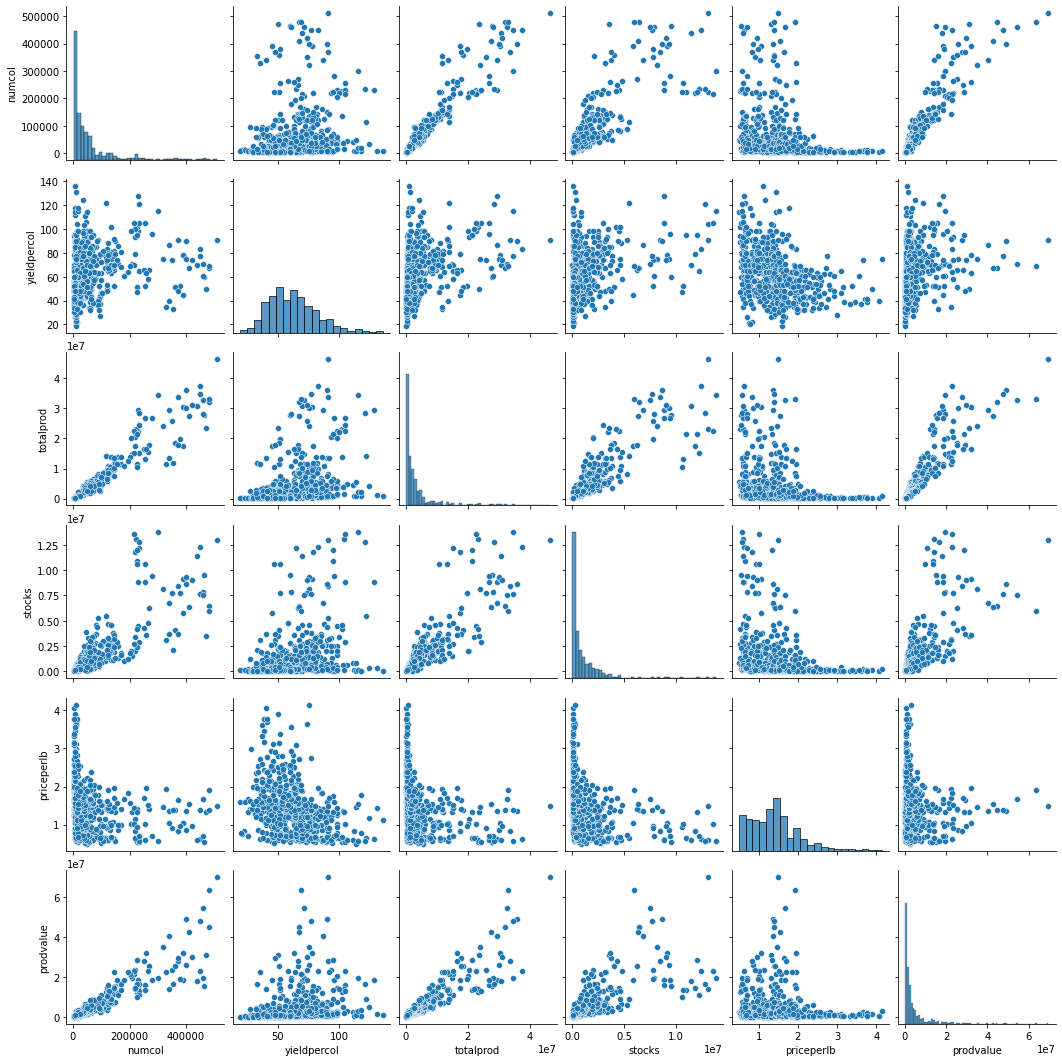

In [48]:
sns.pairplot(mydata[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']]);

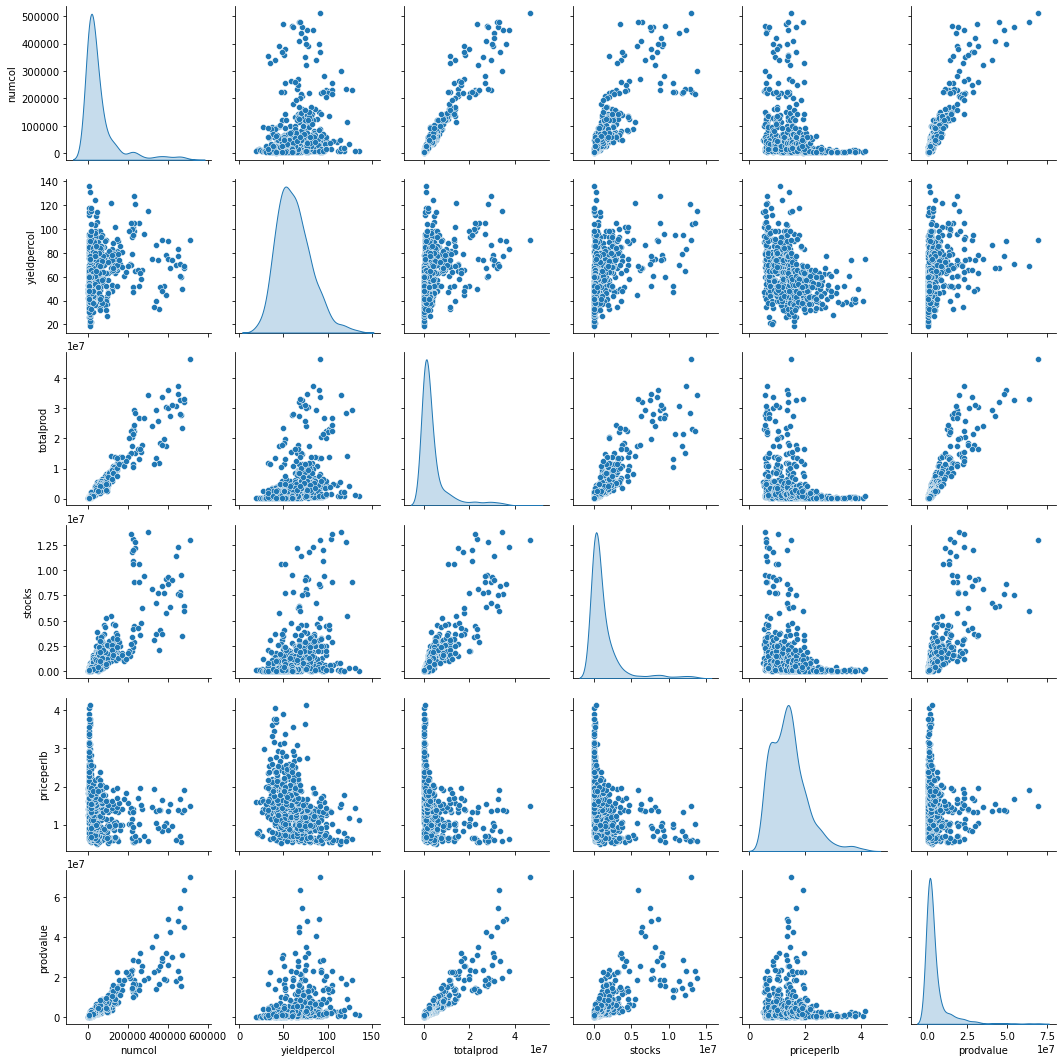

In [49]:
sns.pairplot(mydata[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']],diag_kind='kde');

In [53]:
my_honey_bee_df= mydata[['numcol', 
              'yieldpercol', 
              'totalprod', 
              'stocks', 
              'priceperlb', 
              'prodvalue']]

my_honey_bee_df.head()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
0,16000.0,71,1136000.0,159000.0,0.72,818000.0
1,55000.0,60,3300000.0,1485000.0,0.64,2112000.0
2,53000.0,65,3445000.0,1688000.0,0.59,2033000.0
3,450000.0,83,37350000.0,12326000.0,0.62,23157000.0
4,27000.0,72,1944000.0,1594000.0,0.70,1361000.0


In [54]:
cor =my_honey_bee_df.corr()

In [55]:
cor

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


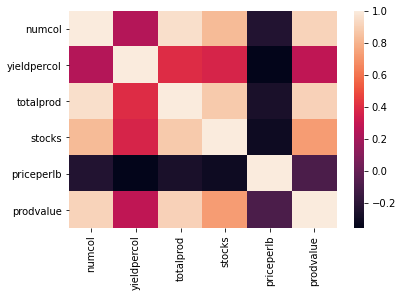

In [56]:
sns.heatmap(cor);

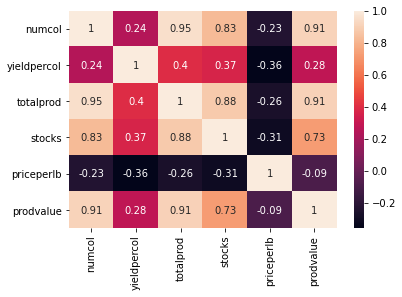

In [57]:
sns.heatmap(cor,annot=True);

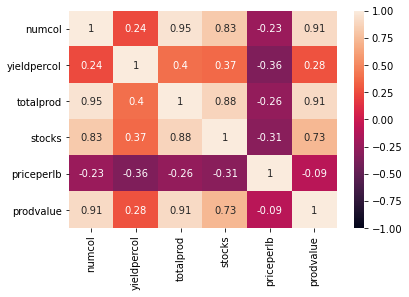

In [58]:
sns.heatmap(cor,annot=True,vmin=-1,vmax=1);

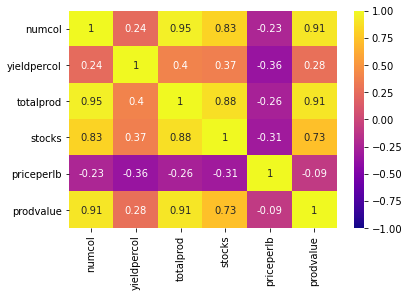

In [59]:
sns.heatmap(cor,annot=True,cmap='plasma',vmin=-1,vmax=1);

#### What is the general Production trend from 1998 to 2012? Describe visually

C:\Users\Rahul Aggarwal\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


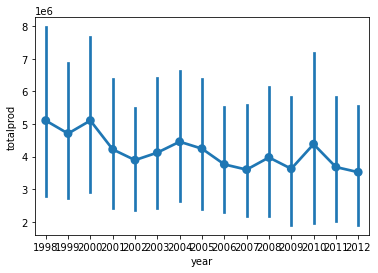

In [60]:
sns.pointplot(mydata['year'], mydata['totalprod']);

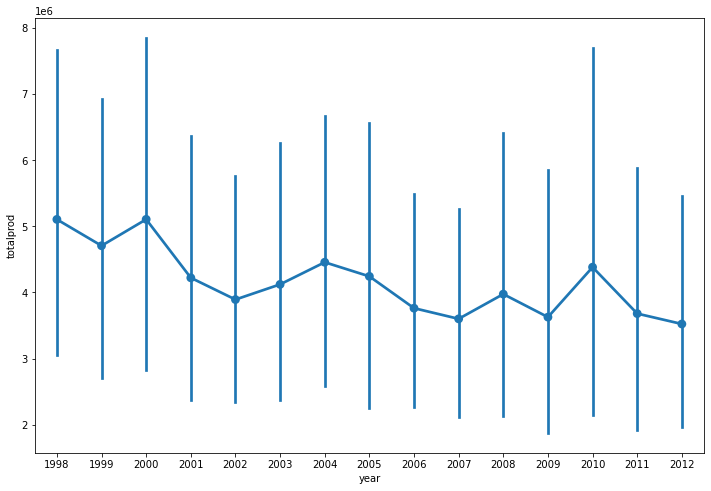

In [62]:
plt.subplots(figsize=(12,8))
sns.pointplot(x=mydata['year'],y= mydata['totalprod']);

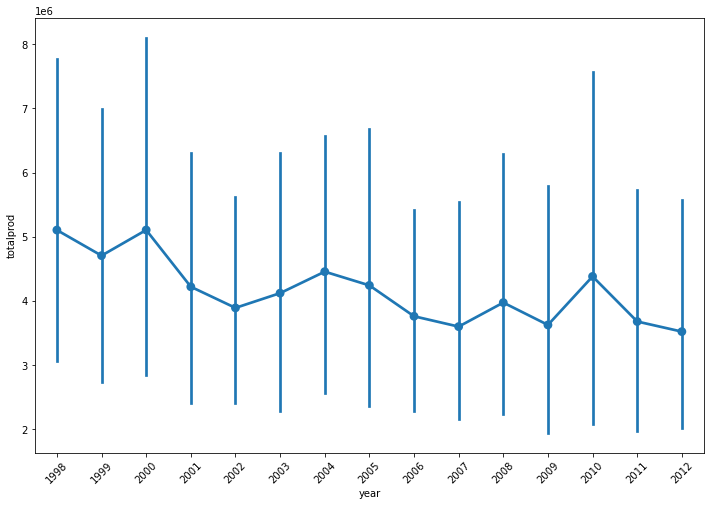

In [63]:
plt.subplots(figsize=(12,8))
sns.pointplot(x=mydata['year'],y= mydata['totalprod'])
plt.xticks(rotation =45);

#### How is the production trend for each State? Describe visually - Hint (Use sns.FacetGrid() & g.map() functions)

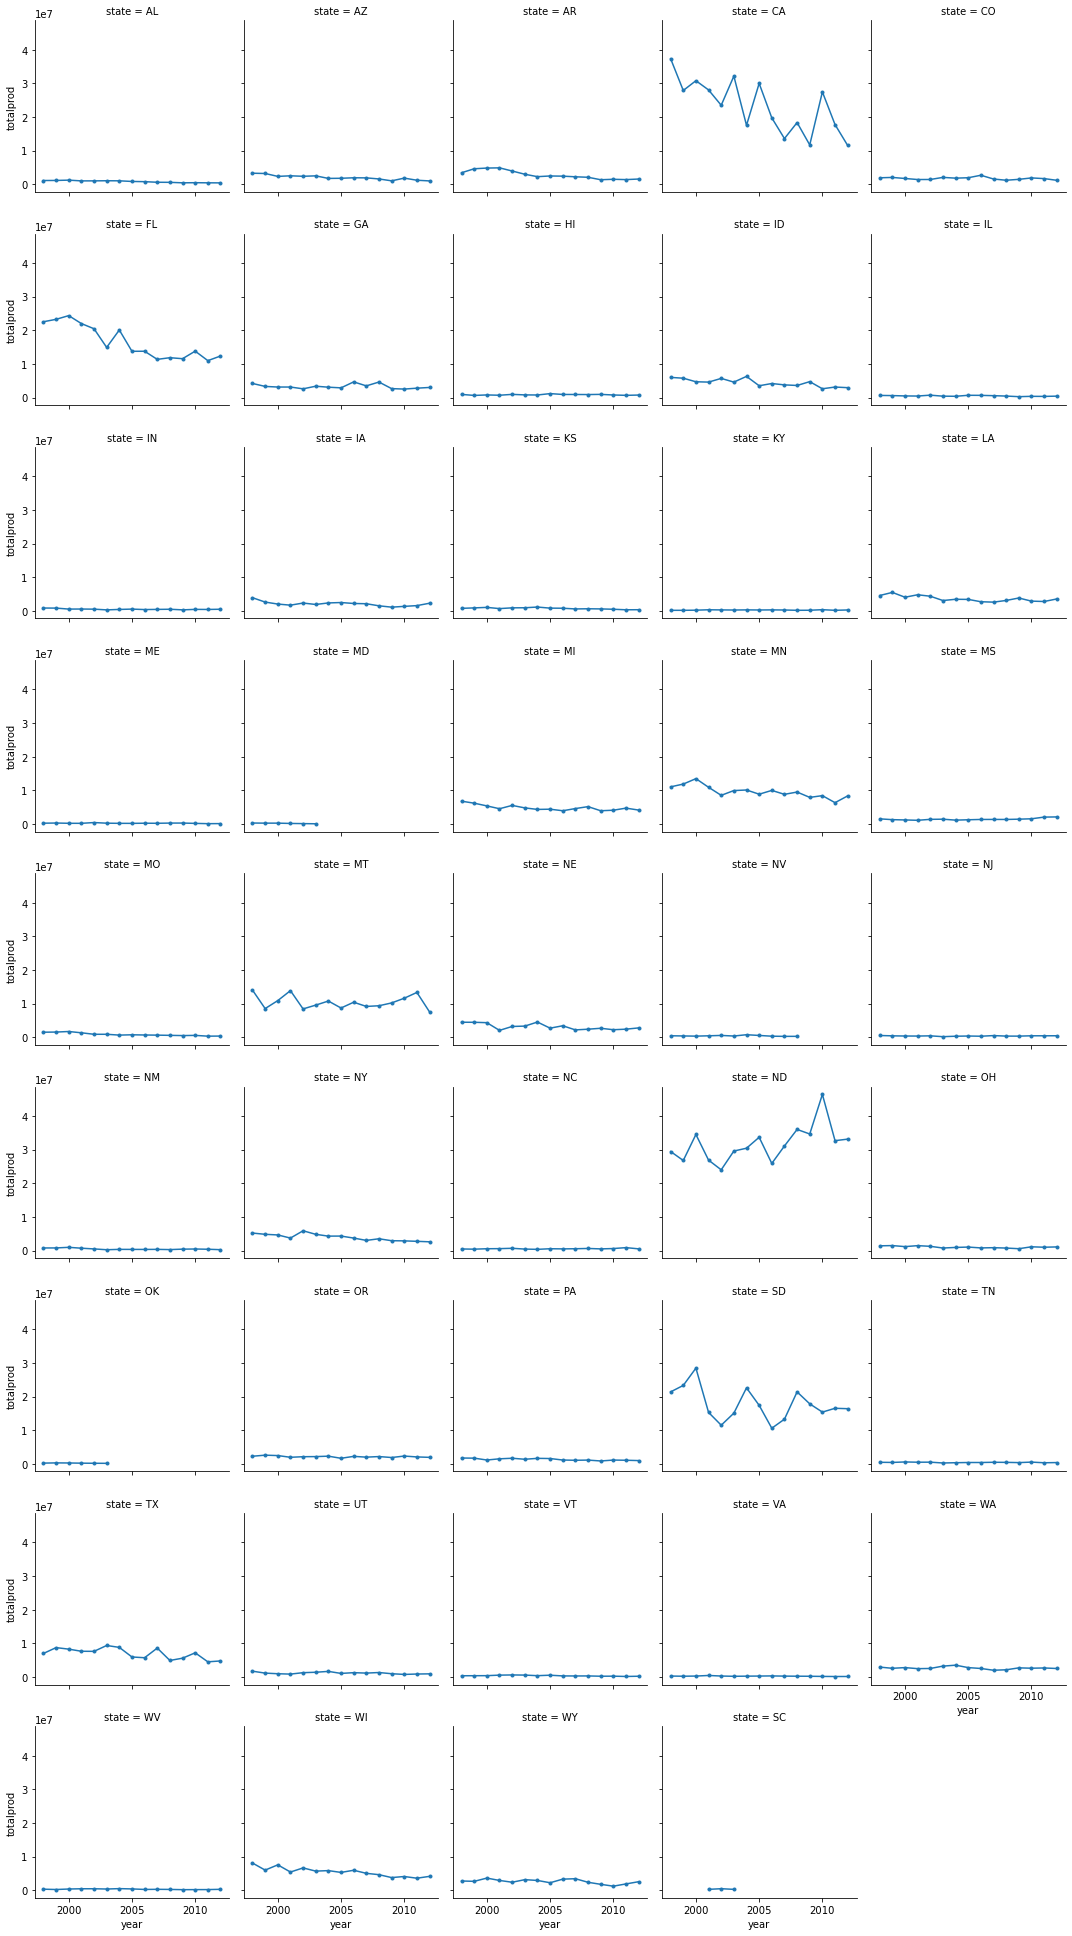

In [64]:
g = sns.FacetGrid(mydata, col="state", col_wrap=5, height=3)
g = g.map(plt.plot, "year", "totalprod", marker=".")

In [ ]:
plt.plot(mydata["year"], mydata["totalprod"]);

#### Is there a linear relationship between the Number of Colonies & Value in Production? Check at an overall level, at state and year levels as well

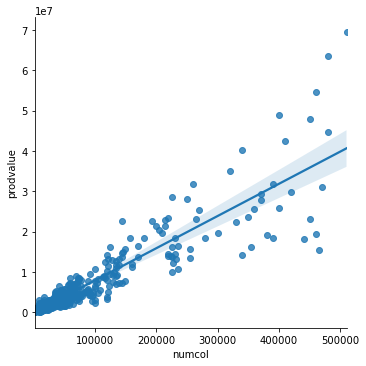

In [65]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata);

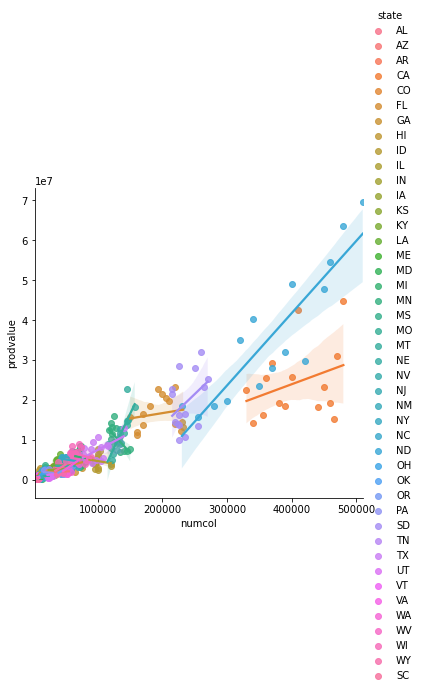

In [66]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata, hue='state');

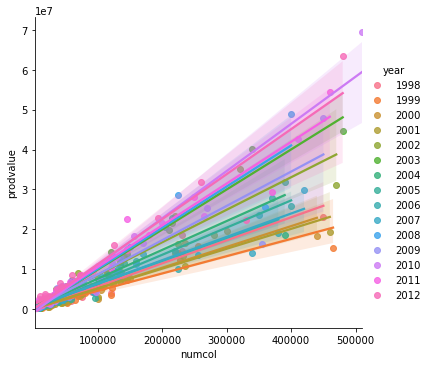

In [67]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata, hue='year');

In [ ]:
!pip install plotly

In [68]:
# Interactive scatter plot using plotly package
import plotly.express as px

In [69]:
mydata.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [73]:
px.scatter(mydata, x = 'numcol', y = 'prodvalue', animation_frame = 'year', size = 'totalprod')

#### Check the distribution of total production across each year using boxplots

C:\Users\Rahul Aggarwal\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



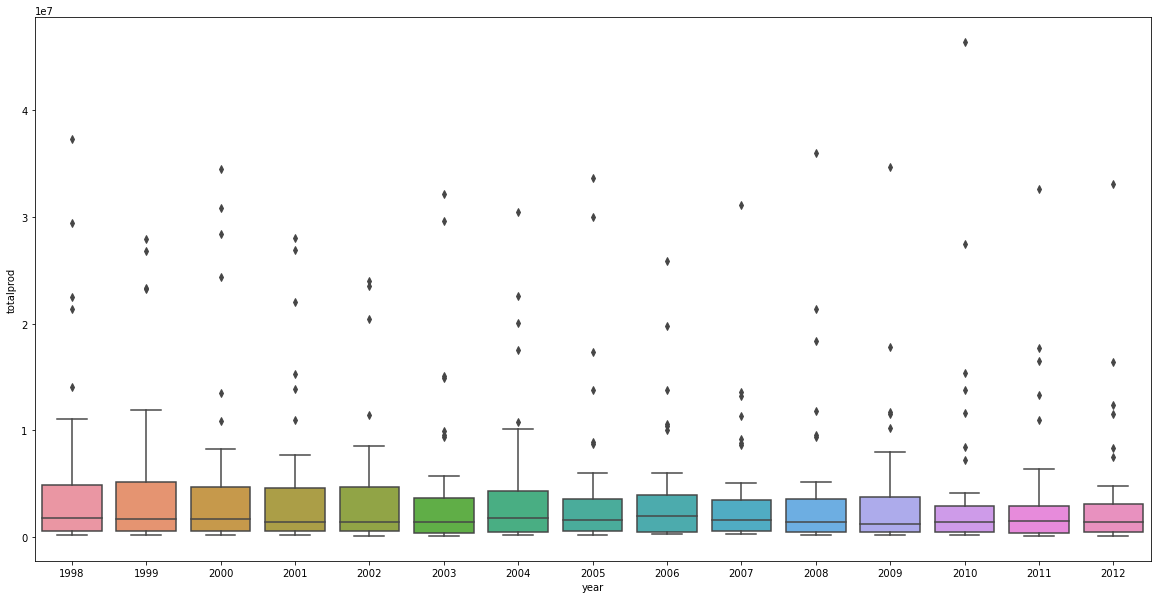

In [74]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot('year','totalprod',data=mydata);

C:\Users\Rahul Aggarwal\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



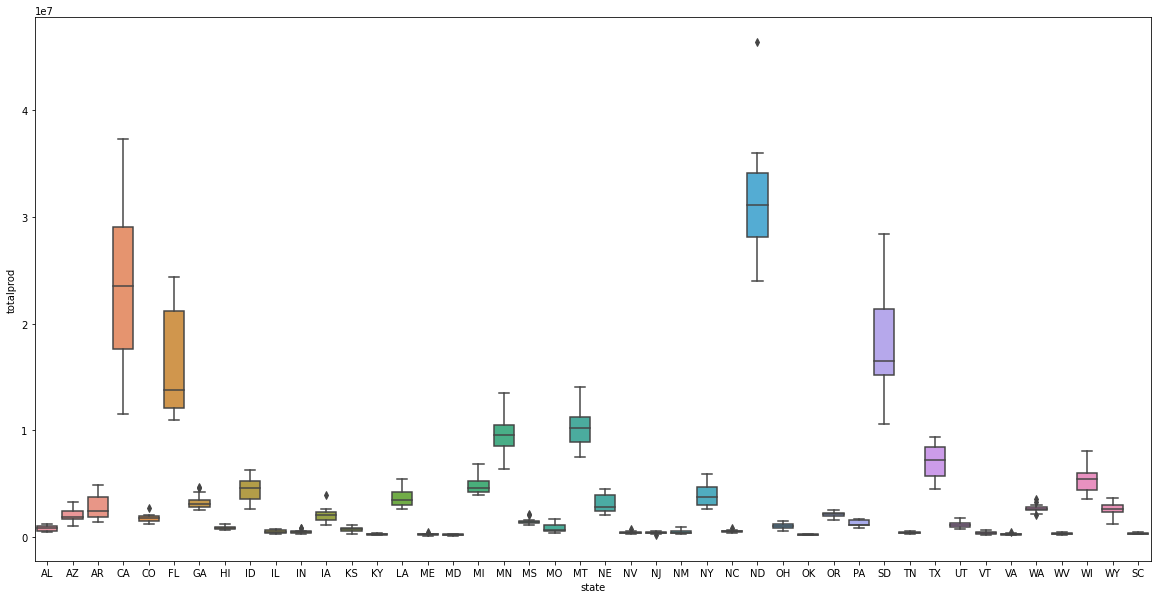

In [75]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot('state','totalprod',data=mydata);

#### How has the Value in Production changed over the years?

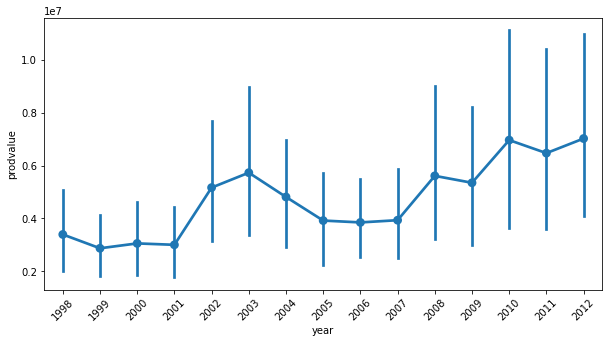

In [79]:
plt.figure(figsize=(10,5))
sns.pointplot(x=mydata['year'], y=mydata['prodvalue'])
plt.xticks(rotation=45);

#### What is the linear relationship between Production volume & value over the years?

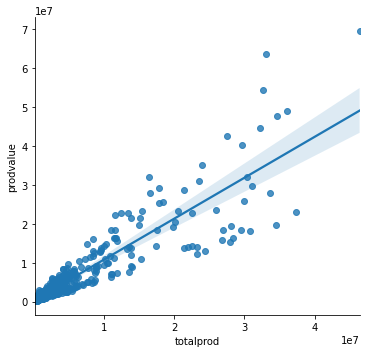

In [81]:
sns.lmplot(x="totalprod", y="prodvalue", data=mydata);